## Classification using k-NN

### Import required modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
sn.set(style='whitegrid')

 ### load the data file
The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
# show only the first five rows
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
# the total number of samples is 59
fruits.shape

(59, 7)

In [6]:
# create a mapping from class/fruit label to fruit name
fruit_lable_to_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))   
fruit_lable_to_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Visualize the data using scatter plot

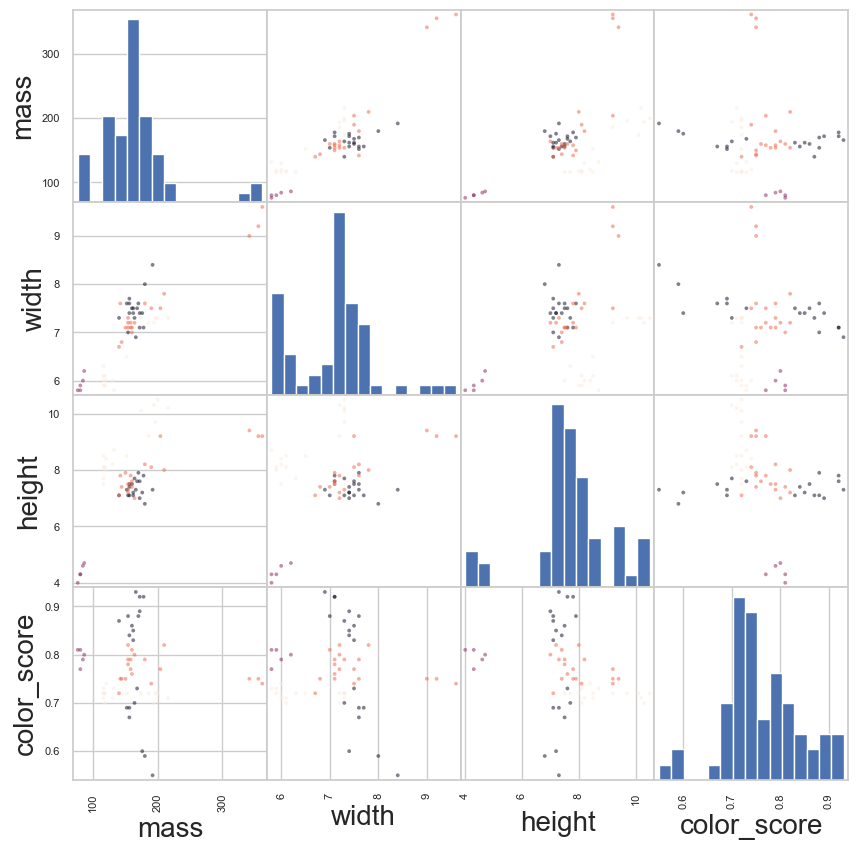

In [7]:
X = fruits.iloc[:,1:]
Y = fruits['fruit_label']
scatter = pd.plotting.scatter_matrix(X, c= Y, marker = '.', s=30, hist_kwds={'bins':15}, figsize=(10,10))
#y labels
temp1=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in scatter.ravel()]
#x labels
temp2=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in scatter.ravel()]

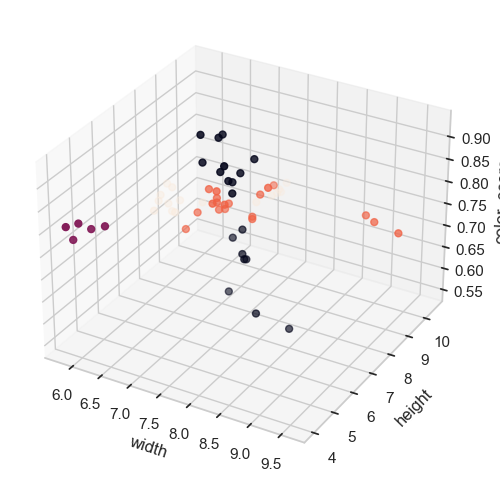

In [8]:
# plotting a 3D scatter plot
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['width'], X['height'], X['color_score'], c = Y, marker = '.', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Select three features: width, height, color_score

In [9]:
features = fruits.columns[-3:].tolist()
features

['width', 'height', 'color_score']

### Split the data into a Training data Set and a Testing data Set

In [10]:
X = fruits[['width', 'height', 'color_score']]
Y = fruits['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
X_train.head()

,width,height,color_score
30,7.1,7.5,0.79
41,7.6,8.2,0.79
33,7.5,8.1,0.74
42,7.2,7.2,0.82
48,7.3,10.1,0.72


In [12]:
X_train.shape

(47, 3)

In [13]:
Y_train.shape

(47,)

In [14]:
X_test

,width,height,color_score
26,9.6,9.2,0.74
35,7.1,7.9,0.75
43,7.2,10.3,0.70
28,6.7,7.1,0.72
11,7.1,7.6,0.92
2,7.4,7.2,0.60
34,7.6,7.8,0.75
46,7.3,10.2,0.71
40,7.1,7.5,0.78
22,7.3,7.1,0.87


In [15]:
X_test.shape

(12, 3)

In [16]:
Y_test.shape

(12,)

### Build a KNN Classifier

In [17]:
# instance of the classifier
knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier using the training data (fit the model to the data)

In [18]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

### Use the trained KNN classifier to classify a sample in  the testing set

In [19]:
sample_test = X_test.iloc[0,:]
sample_test

width          9.60
height         9.20
color_score    0.74
Name: 26, dtype: float64

In [20]:
label_true = Y_test.iloc[0]
print('The true label is', label_true, ':', fruit_lable_to_name[label_true])

The true label is 3 : orange


In [21]:
label_predicted = knn.predict([sample_test])
print('The label predicted by knn is', label_predicted[0], ':', fruit_lable_to_name[label_predicted[0]])
if label_predicted[0] == label_true:
    print('Classification is accurate for this testing sample')
else:
    print('Classification is wrong for this testing sample')

The label predicted by knn is 3 : orange
Classification is accurate for this testing sample


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Use the trained k-NN classifier to classify a sample that is not in the training set nor the testing set

In [22]:
sample_new = [6.0, 4.0, 0.8]
label_predicted = knn.predict([sample_new])
print('The label predicted by knn is', label_predicted[0], ':', fruit_lable_to_name[label_predicted[0]])

The label predicted by knn is 2 : mandarin


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Evaluate Performance of the KNN Classifier on the Training Set and the Testing Set

In [23]:
knn.score(X_train, Y_train)

0.8723404255319149

In [24]:
knn.score(X_test, Y_test)

0.75

Here is another way to obtain accuracy

In [25]:
Y_train_pred = knn.predict(X_train)
accuracy_score(Y_train, Y_train_pred)

0.8723404255319149

In [26]:
Y_test_pred = knn.predict(X_test)
accuracy_score(Y_test, Y_test_pred)

0.75

<Axes: >

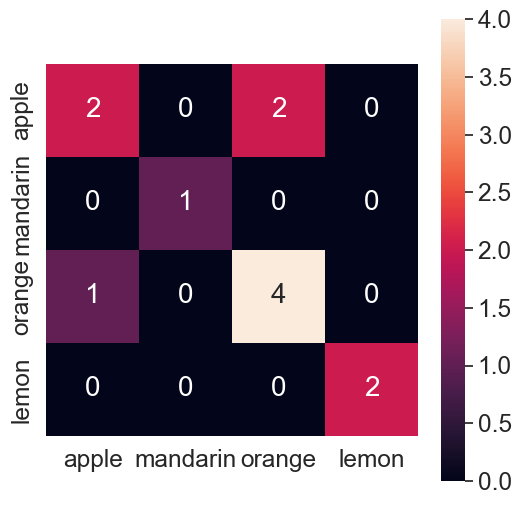

In [27]:
cm = confusion_matrix(Y_test, Y_test_pred)
df_cm = pd.DataFrame(cm, index = ['apple', 'mandarin', 'orange', 'lemon'],
                     columns = ['apple', 'mandarin', 'orange', 'lemon'])
plt.figure(figsize = (6,6))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, square=True)

<Axes: >

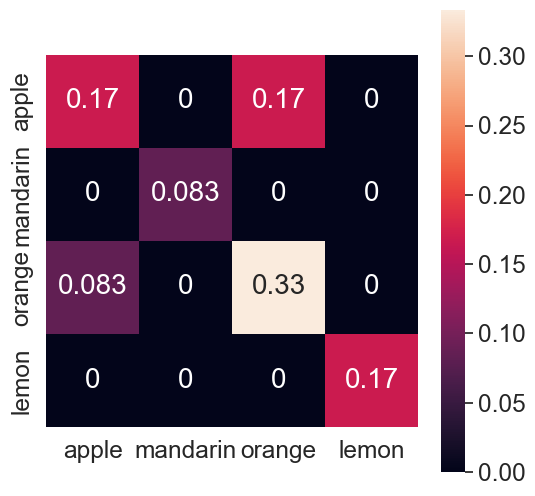

In [28]:
#normalize the confusion matrix
df_cm = pd.DataFrame(cm/Y_test.shape[0], index = ['apple', 'mandarin', 'orange', 'lemon'],
                     columns = ['apple', 'mandarin', 'orange', 'lemon'])
plt.figure(figsize = (6,6))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, square=True)

In this case we can see how the mean value of the accurracy increases with a bigger split of the training set.

### Let's use two features: width/height, color_score

In [29]:
#add a new column named WdH
fruits['WdH']=fruits['width']/fruits['height']
#select the features
X = fruits[['WdH', 'color_score']]
Y = fruits['fruit_label']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    
# build a KNN classifier    
knn = KNeighborsClassifier(n_neighbors = 5)
# train the KNN classifier
knn.fit(X_train, Y_train)
# test the KNN classifier
acc_train=knn.score(X_train, Y_train)
acc_test=knn.score(X_test, Y_test)
print('training accuracy=', acc_train)
print('testing accuracy=',  acc_test)

training accuracy= 0.9361702127659575
testing accuracy= 0.9166666666666666


#### Feature normalization: scale the feature in the range of 0 to 1

In [30]:
X = fruits[['WdH', 'color_score']]
Y = fruits['fruit_label']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)           
# build a minmax transformer
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)
# build a KNN classifier    
knn = KNeighborsClassifier(n_neighbors = 5)
# train the KNN classifier
knn.fit(X_train, Y_train)
# test the KNN classifier
acc_train=knn.score(X_train, Y_train)
acc_test=knn.score(X_test, Y_test)    
print('training accuracy=', acc_train)
print('testing accuracy=',  acc_test)

training accuracy= 0.9574468085106383
testing accuracy= 0.9166666666666666


In [31]:
X = fruits[['width', 'height', 'color_score']]
Y = fruits['fruit_label']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# build a minmax transformer
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)
# build a KNN classifier    
knn = KNeighborsClassifier(n_neighbors = 5)
# train the KNN classifier
knn.fit(X_train, Y_train)
# test the KNN classifier
acc_train=knn.score(X_train, Y_train)
acc_test=knn.score(X_test, Y_test)    
print('training accuracy=', acc_train)
print('testing accuracy=',  acc_test)

training accuracy= 0.9787234042553191
testing accuracy= 1.0


### Plot decision boundaries to visualize the classification result

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


[Text(1, 1, 'apple'),
 Text(1, 2, 'mandarin'),
 Text(1, 3, 'orange'),
 Text(1, 4, 'lemon')]

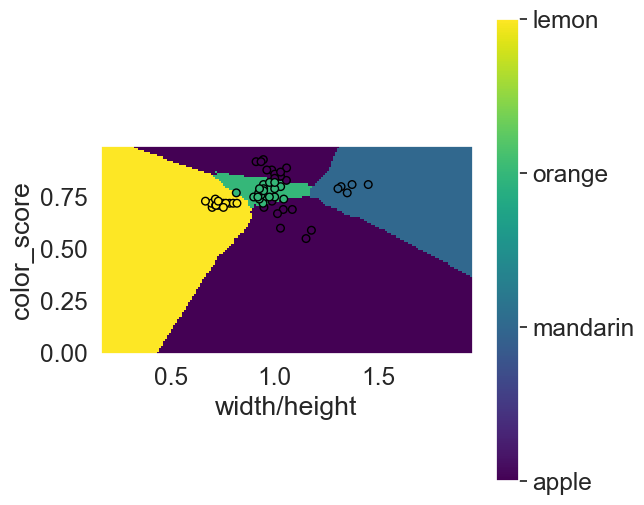

In [32]:
X = fruits[['WdH', 'color_score']]
Y = fruits['fruit_label']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    
# Fit to data, then transform it.
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)
# build a KNN classifier    
knn = KNeighborsClassifier(n_neighbors = 5)
# train the KNN classifier
knn.fit(X_train, Y_train)
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X['WdH'].min() - .5, X['WdH'].max() + .5
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xx_r=xx.reshape(xx.shape[0]*xx.shape[1],1)
yy_r=yy.reshape(yy.shape[0]*yy.shape[1],1)
xx_yy = np.concatenate([xx_r, yy_r], axis=1)
xx_yy = scaler.transform(xx_yy)
Z = knn.predict(xx_yy)
Z = Z.reshape(xx.shape)
# Put the result into a color plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.pcolormesh(xx, yy, Z,cmap='viridis')
sc=ax.scatter(X['WdH'], X['color_score'],c=Y,cmap='viridis', 
              marker='o',edgecolor = 'black', s=30)
ax.set_xlabel('width/height')
ax.set_ylabel('color_score')
ax.set_aspect('equal')
cbar = fig.colorbar(sc, cmap='viridis', ticks=[1, 2, 3, 4])
cbar.ax.set_yticklabels(['apple', 'mandarin', 'orange', 'lemon'])